In [53]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, DifferentialEquations, LinearAlgebra
gr();

# M3M6: Methods of Mathematical Physics 2018

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Solution Sheet 1


----------

## Problem 1.1

### 1.
Use fundamental theorem of algebra: a polynomial is a constant times a product of terms like $z - \lambda_k$, where $\lambda_k$ are the roots. In this case, the roots are $a$ times the quartic-root of $-1$, hence  this gives us:
\begin{align*}
z^4 + a^4 = (z-a \E^{\I \pi /4})(z-a \E^{3\I \pi /4})(z-a \E^{5\I \pi /4})(z-a \E^{7\I \pi /4})  
\end{align*}
We are only interested in the root $a \E^{\I \pi /4}$, thus we simplify the expression
Therefore 
$$
{z^3 \sin z \over z^4 + a^4}  = {z^3 \sin z \over (z-a \E^{3\I \pi /4})(z-a \E^{5\I \pi /4})(z-a \E^{7\I \pi /4})} {1 \over z-a \E^{\I \pi /4}} = {a^3\E^{3\I \pi /4} \sin(a \E^{\I \pi /4}) \over a^3 (\E^{\I \pi / 4} - \E^{3\I \pi /4})(\E^{\I \pi / 4} - \E^{5\I \pi /4})(\E^{\I \pi / 4} - \E^{7\I \pi /4})} {1 \over z-a \E^{\I \pi /4}} + O(1)
$$
Therefore, 
$$
\Res_{z = a \E^{\I \pi /4}} {z^3 \sin z \over z^4 + a^4} = { \E^{3\I \pi /4} \sin(a \E^{\I \pi /4}) \over \E^{3\I \pi /4} (1 - \E^{\I \pi \over 2})(1 - \E^{\I \pi })(1 - \E^{3\I \pi/2 })}= { \sin(a \E^{\I \pi /4}) \over (1 - \I) (2) (1+ \I)}= { \sin(a \E^{\I \pi /4}) \over 4}
$$

Let's check our work: we compare the numerically calculated residue to the formula we have derived:

In [2]:
a = 2.0
γ = Circle(a*exp(im*π/4), 0.1)
f = Fun(z -> z^3*sin(z)/(z^4+a^4), γ)
sum(f)/(2π*im), sin(a*exp(im*π/4))/4

(0.5378838853348212 + 0.07544036746694016im, 0.5378838853348215 + 0.0754403674669402im)

#### 2. 

We have 
$$
(z^2-1)^2 = (z-1)^2(z+1)^2
$$
Thus this is a slightly more challenging since it has a double pole. But we can expand using Geometric series:
$$
    {z+1 \over (z^2-1)^2} = {1 \over (z-1)^2} {1 \over 2 - (1-z)} = {1 \over (z-1)^2} {1 \over 2} (1 + (1-z)/2 +O(1-z)^2) = {1 \over 2(z-1)^2} - {1 \over 4 (z-1)}  + O(1)
$$
Thus the residue is the negative-first Laurent coefficient, namely $-{1 \over 4}$.

We again check our work:

In [3]:
γ = Circle(1, 0.1)
f = Fun(z -> (z+1)/(z^2-1)^2, γ)
sum(f)/(2π*im) # almost equals -1/4

-0.2500000000000023 - 1.1916485920484316e-16im

#### 3. 

$$ {z^2 \E^z \over z^3 - a^3} = {z^2 \E^z \over (z-a) (z^2 + az + a^2)}
$$
We thus need only evaluate the extra term at $z=a$:
$$
\Res_{z = a} {z^2 \E^z \over z^3 - a^3} = {\E^a \over 3}
$$

Let's check:

In [4]:
a = 2.0

γ = Circle(a, 0.1)
f = Fun(z -> z^2*exp(z)/(z^3-a^3), γ)
sum(f)/(2π*im), exp(a)/3

(2.4630186996435506 + 4.738982805534393e-16im, 2.46301869964355)

## Problem 1.2

### 1.
Change of variables $z = \E^{\I \theta}$, $\dz = \I \E^{\I \theta} \D\theta = \I z \D\theta$, $\cos \theta = {z + z^{-1} \over 2}$ gives
$$
\int_0^{2 \pi} {\D\theta \over 5-4 \cos \theta}  = - \I \oint {\dz \over 5z - 2z^2 - 2}  = \I \oint {\dz \over (z-2)(2z-1)} = -\pi \Res_{z=1/2} {1 \over (z-2)(z-1/2)} = {2 \over 3} \pi 
$$


In [5]:
θ = Fun(0 .. 2π)
sum(1/(5-4cos(θ))) -2π/3

8.881784197001252e-16

### 2. 
Use $\cos 2 \theta = { \E^{2 \I \theta} + \E^{-2 \I \theta} \over 2} = {z^2 + z^{-2} \over 2}$ to get
$$
\int_0^{2 \pi} {\cos 2 \theta \D\theta \over 5+4 \cos \theta}  = - {\I \over 4} \oint { (z^4 + 1)\dz \over z^2 (z+1/2)(z+2)}  = {\pi \over 2} \left( \Res_{z=-1/2} + \Res_{z=0}\right) {z^4+1 \over z^2(z+2)(z+1/2)} = {\pi \over 6}
$$

In [6]:
θ = Fun(0 .. 2π)
sum(cos(2θ)/(5-4cos(θ)))/π

0.1666666666666669

### 3.  

Because the integrand is analytic  and $O(z^{-2})$ in the upper half plane, we can use the residue theorem in the upper half plane using
$$
 {1 \over (z^2+1) (z^2 + 4)} = {1 \over (z+\I)(z-\I) (z+2\I)(z-2\I)}
$$

This has two poles in the upper half plane:

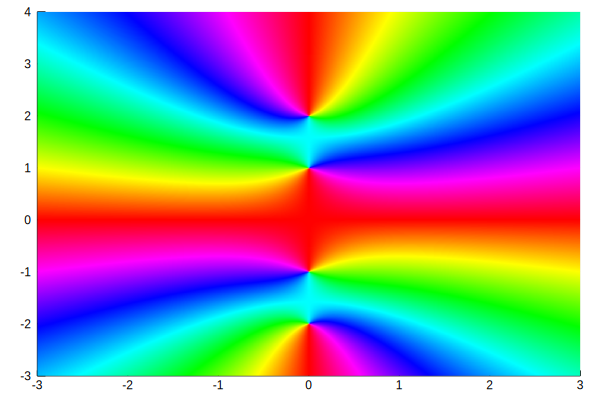

In [7]:
phaseplot(-3..3, -3..4, z-> 1/((z^2+1)*(z^2+4)))

\begin{align*}
	\int_{-\infty}^\infty    {1 \over (x^2+1)(x^2+4)} \dx &=
    2 \pi \I \left( \Res_{z = \I} + \Res_{z = 2\I}\right){1 \over (z^2+1)(z^2+4)} \\
    & = 2 \pi \I \left( {1 \over 2 \I 3 \I (-\I)} + {1 \over 3 \I  \I 4\I} \right) = \pi/ 6
\end{align*}

We can check the result numerically:

In [8]:
x = Fun( Line())
sum(1/((x^2+1)*(x^2+4)))

0.523598775598299

In [9]:
π/6

0.5235987755982988

### 4. 

Again, decays like $O(z^{-2})$ in upper half plane so we can use residue calculus. This integrand has poles at $z = \I$ and $z = 3 \I$:

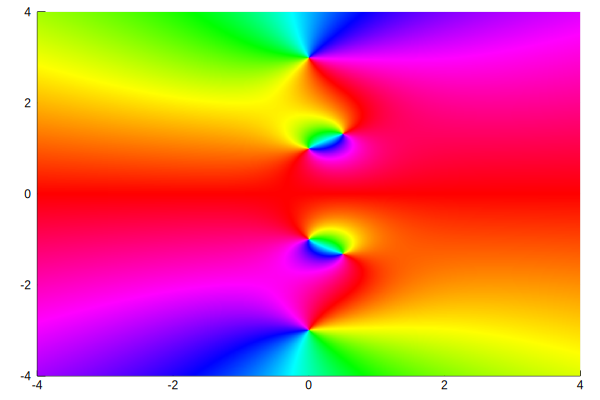

In [10]:
phaseplot(-4..4, -4..4, z-> (z^2 - z + 2) / (z^4 + 10z^2 +9))

The residues are $(-1-\I)/16$ and $(3-7\I)/48$ giving the answer
$$
5\pi \over 12
$$


### 5.
$$
	\int_{-\infty}^\infty    {1 \over x + \I } \dx
$$

Trick question: it's undefined because the integral doesn't decay fast enough. But what if I had asked for 
$$
	\dashint_{-\infty}^\infty    {1 \over x + \I } \dx?
$$

We can't use residue theorem since it doesn't decay fast enough, but we can use, with a contour $C_R = \{ R \E^{\I theta} : 0 \leq \theta \leq \pi \}$
$$
\oint_{[-M, M] \cup C_R} {1 \over z + \I}   = 0
$$
Further, by direct substitution, we have 
$$
\int_{C_R} {1 \over z + \I}\dz = \I \int_0^\pi  R {\E^{\I \theta} \over R \E^{\I \theta} + \I} \D \theta 
$$
Letting $R \rightarrow \infty$, the integrand tends to one uniformly hence  
$$
 \int_{C_R} {1 \over z + \I}\dz  \rightarrow \I \int_0^\pi  \D \theta  = \I \pi.
$$
Therefore, we have
$$
	\dashint_{-\infty}^\infty    {1 \over x + \I } \dx = \lim_{M\rightarrow \infty} \int_{-M}^M {1 \over x + \I}  \dx =  - \I \pi .
    $$
    
    Indeed:

In [12]:
x = Fun(-1000 .. 1000)
sum(1/(x+im))

-8.881784197001252e-16 - 3.13959265425659im

### 6.
$$
\int_{-\infty}^\infty    {\sin 2x \over x^2 + x + 1} \dx = \Im \int_{-\infty}^\infty    {\E^{ 2 \I x} \over x^2 + x + 1} \dx 
$$
This can be deformed in the upper half plane with a pole at ${-1 + \I \sqrt{3} \over 2}$, using residue calculus gives us
$$
   -{2 \pi \over \sqrt 3} {\sin 1 \over \E^\sqrt{3}}
$$



In [13]:
x = Fun(-100 .. 100)
sum(sin(2x)/(x^2+x+1))

-0.5400548830723747

In [14]:
-2π/sqrt(3) * sin(1)/exp(sqrt(3))

-0.5400553569742235




### 7.
$$
	\int_{-\infty}^\infty    {\cos x \over x^2 + 4} \dx = \Re 	\int_{-\infty}^\infty    {\E^{\I x}\over x^2 + 4} \dx
$$
and residue calculus gives ${\pi \over 2 \E^2}$


In [15]:
M = 200
x = Fun(-M .. M)
sum(cos(x)/(x^2+4)) # converges if we make M even bigger

0.21254026836702827

In [16]:
π/(2*exp(2))

0.21258416579381814


### 8.
$$
	\int_{-\infty}^\infty    {x \sin x \over x^2 + 1} \dx = { \pi \over \E}
    $$
using Residue calculus. You need to appeal to Jordan's lemma to argue that it can still be done even with only $O(x^{-1})$ decay.

In [17]:
M = 2000
x = Fun(-M .. M)
sum(x*sin(x)/(x^2+1)) # Converges if we make M even bigger

1.1560943440671996

In [49]:
π/ℯ

1.1557273497909217

### 9. 
$$
\int_{-\infty}^\infty {\cos a x - \cos b x \over x^2}  \dx \qqwhere a,b > 0
$$

We have for $f(x) = {\E^{\I a x} - \E^{\I b x} \over x^2}$
$$
\Re f(x) = {\cos a x - \cos b x \over x^2}
$$

Note that, since $\cos x = 1 + x^2/2 + O(x^4)$, the integrand is fine near zero:
$$
{\cos a x - \cos b x \over x^2} = {(a -b)  \over 2} + O(x^2)
$$
But $f(x)$ has a pole:
$$
     {\E^{\I a x} - \E^{\I b x} \over x^2}  = {\I (a-b) \over x} + O(1)
$$
To rectify this, we need to be a bit more careful. First note that
$$
\int_{\infty}^\infty {\cos a x - \cos b x \over x^2} \dx = \lim_{\epsilon \rightarrow 0} \left(\int_{-\infty}^{-\epsilon} + \int_\epsilon^\infty \right){\cos a x - \cos b x \over x^2} \dx = \Re \dashint_{-\infty}^\infty f(x) \dx
$$
Then we construct a contour avoiding zero as follows:

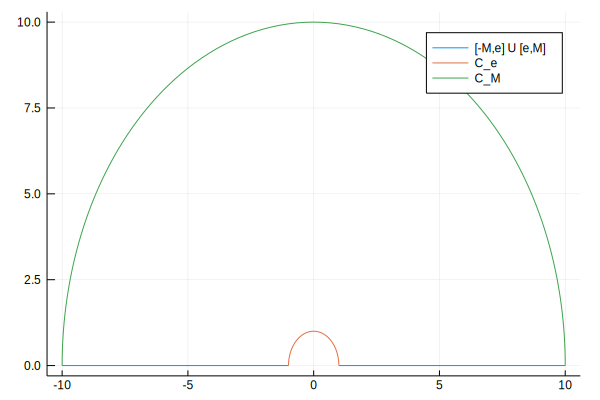

In [19]:
M = 10
ε = 1.0

plot(Segment(-M, -ε) ∪ Segment(ε, M);label="[-M,e] U [e,M]")
plot!(Arc(0.,ε, (π,0.)); label="C_e")
plot!(Arc(0., M, (0,π)); label = "C_M")

Note that $\oint_\gamma f(z) \dz = 0$, 
$$\int_{C_\epsilon} {\E^{\I a z } - \E^{\I b z} \over z^2} \dz =
 \int_\pi^0 { (b-a) \E^{\I \theta}  + O(\epsilon) \over \E^{ \I \theta}} \D\theta \rightarrow (a-b) \pi
$$
Also, as the integrand is $O(z^{-2})$ the integral over $C_M$ vanishes as $M \rightarrow \infty$. We therefore get
$$
    \dashint f(x)\dx = (b-a)\pi
$$

In [20]:
ε =0.001
M = 600.0
x = Fun(Segment(-M , -ε) ∪ Segment(ε, M))
a = 2.3; b = 3.8
sum((cos(a*x) - cos(b*x))/x^2) # Converges if we make M bigger

4.703235784846408

In [21]:
π*(b-a)

4.71238898038469

### 10.
Use binomial formula
\begin{align*}
\int_0^{2 \pi} (\cos \theta)^n \D \theta &= {1 \over 2^n \I} \oint (z+z^{-1})^n {\dz \over z} \\
 &=  {1 \over 2^n \I} \sum_{k=0}^n {n! \over k! (n-k)!} \oint z^k z^{k-n} {\dz \over z} \\
 &=  {1 \over 2^n \I} \sum_{k=0}^n {n! \over k! (n-k)!} \oint z^{2k-n-1}\dz
\end{align*}

We only have a residue of $2k-n-1 = -1$, that is, if $2k = n$. If $n$ is odd, this can't happen (duh! the integral is symmetric with respect to $\theta$). If it's even, then we have
$$
\int_0^{2 \pi} (\cos \theta)^n \D \theta =  {\pi \over 2^{n-1} }  {n! \over 2 (n/2)!} 
 $$

In [22]:
θ = Fun(0 .. 2π)
n = 4;
sum(cos(θ)^n)

2.356194490192353

In [23]:
π*factorial(1.0n)/(2^(n-1)*2*factorial(n/2))

2.356194490192345

## Problem 2.1 

By integrating around a rectangular contour with vertices at $\pm R$ and $\pi \I \pm R$ and letting $R \rightarrow \infty$, show that:
	$$\int_0^\infty \sech x \dx = {\pi \over 2}$$
where $\sech x = {2 \over \E^{-x} + \E^x}$.


Recall $\sech x = {2 \over \E^{-x} + \E^x} $. This shows that $\sech(-x) = \sech x$
But we also have 
$
\sech(x + \I \pi) =  {2 \over \E^{-x-\I \pi} + \E^{x+ \I \pi}} =  {2 \over -\E^{-x} - \E^{x}} = -\sech x
$
Thus we have
$$
    4\int_0^\infty \sech x \dx = \left[ \int_{-\infty}^\infty + \int_{\infty+\I\pi}^{-\infty + \I \pi} \right] \sech z \dz
$$

We can approximate this using
$$
\left[ \int_{-R}^R + \int_R^{R+\I \pi} + \int_{R+\I \pi}^{-R+\I\pi} + \int_{-R+\I \pi} \right ] \sech z \dz = 2 \pi \I \Res_{z = {\I \pi \over 2}} \sech z  = 2 \pi 
$$
since, for $z_0 = {\I \pi \over 2}$, we have
$$
\sech z = {1 \over \cos \I z} = {1 \over - \I \sin \I z_0 (z- z_0) + O(z-z_0)^2}  
= -{\I \over (z- z_0)} + O(1)
$$

Finally, we need to show that the limit as $R \rightarrow \infty$ tends to the right value. In this case, it follows since 
$$
 \left|\int_R^{R+\I \pi} \sech z \dz \right| \leq {2 \pi \E^{-R} \over 1 - \E^{-2R}} \rightarrow 0
$$
(and by symmetry for $\int_{-R+\I \pi}^{-R}$.)

## Problem 2.2 

Show that the Fourier transform of $\sech x$ satisfies
	$$
	\int_{-\infty}^\infty \E^{\I k x } \sech x \dx = \pi \sech {\pi k \over 2}
	$$
    
Define 
$$f(z) = \E^{\I k z } \sech z = {2 \E^{(1+\I k) z} \over \E^{2 z } + 1}$$
In this case, we have the symmetry
$$
f(x + \I \pi) = - \E^{- k \pi} \E^{\I k x} \sech x = - \E^{-k \pi} f(x)
$$

In [24]:
k = 2.0
f = z -> exp(im*k*z)*sech(z)

-exp(-k*π)f(2.0)

0.00032444937189257726 + 0.0003756543878221788im

In [25]:
f(2.0+im*π)

0.0003244493718925772 + 0.00037565438782217884im

In other words, we have
$$
(1 + \E^{-k \pi}) \int_{-\infty}^\infty f(x) \dx =\left(\int_{-\infty}^\infty +  \int_{\infty+\I \pi}^{-\infty + \I \pi}\right) f(z) \dz 
$$
By similar logic as above, we can show that the integral over the rectangular contour converges to this.

Again, the only pole inside is at $z = {\I \pi \over 2}$, where the residue is $-\I \E^{-\pi k \over 2}$. Thus we have
$$
\int_{-\infty}^\infty f(x) \dx = {2 \pi \E^{-\pi k \over 2} \over 1 + \E^{-k \pi}} = \pi \sech{\pi k \over 2}
$$

## Problem 3.1

We have 
$$
\rho(A) \subseteq B(1,3) \cup B(2,3) \cup B(4,1)
$$
where $B(z_0,r)$ is the ball of radius $r$ around $z_0$.

Here's a depiction:

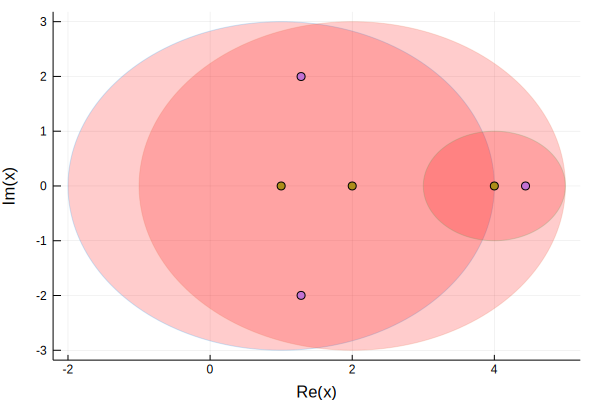

In [26]:
drawdisk!(z0, R) = plot!(θ-> real(z0) + R[1]*cos(θ), θ-> imag(z0) + R[1]*sin(θ), 0, 2π, fill=(0,:red), α = 0.2, legend=false)

A = [1 2 -1; -2 2 1; 0 1 4]

λ = eigvals(A)
p = plot()
drawdisk!(1,3)
drawdisk!(2,3)
drawdisk!(4,1)
scatter!(complex.(λ); label="eigenvalues")
scatter!(complex.(diag(A)); label="diagonals")
p

## Problem 3.2 

We get 
$$
\rho(A) \subseteq B(1,2) \cup B(2,3) \cup B(4,2)
$$

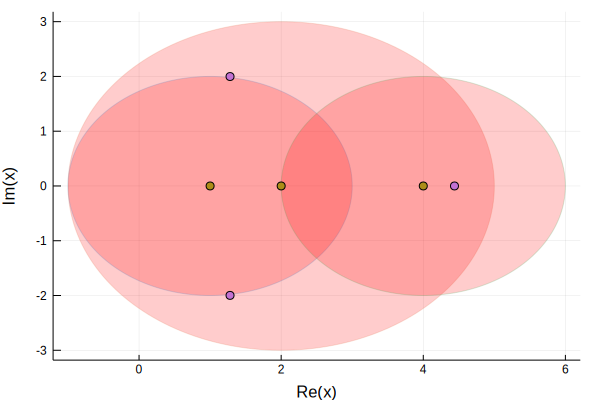

In [27]:
λ = eigvals(A)
p = plot()
drawdisk!(1,2)
drawdisk!(2,3)
drawdisk!(4,2)
scatter!(complex.(λ); label="eigenvalues")
scatter!(complex.(diag(A)); label="diagonals")
p

## Problem 3.3

Because the spectrum live in the intersection of the two estimates, the sharpest bound is
$$
\rho(A) \subseteq B(2,3) 
$$

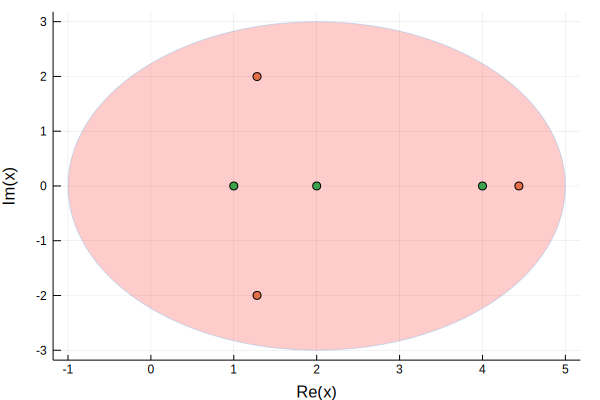

In [28]:
λ = eigvals(A)
p = plot()
drawdisk!(2,3)
scatter!(complex.(λ); label="eigenvalues")
scatter!(complex.(diag(A)); label="diagonals")
p

Thus we can take $2 + 3 \E^{\I \theta}$ as the contour.

## Problem 4.1

Note that in the scalar case $u'' = a u$ we have the solution
$$
u(t) = u_0 \cosh \sqrt{a} t + v_0 {\sinh \sqrt{a} t \over \sqrt a}
$$
Write 
$$A = Q \begin{pmatrix} \lambda_1 \\ & \ddots \\
                        && \lambda_n \end{pmatrix}  Q^\top $$
where $\lambda_k > 0$ 
and then the solution has the form, where $\gamma$ is a contour surrounding the eigenvalues and to the right of zero: 
\begin{align*}
    \vc u(t) = Q \begin{pmatrix} \cosh \sqrt{\lambda_1} t \\ & \ddots \\
                        && \cosh \sqrt{\lambda_n} t  \end{pmatrix}  Q^\top \vc u_0 + 
                        Q \begin{pmatrix} {\sinh \sqrt{\lambda_1} t \over \sqrt{\lambda_1}}\\ & \ddots \\
                        && {\sinh \sqrt{\lambda_n} t \over \sqrt{\lambda_n}} \end{pmatrix}  Q^\top \vc v_0 \\
              = {1 \over 2 \pi \I} Q \begin{pmatrix}  \oint_\gamma {\cosh \sqrt{z} t  \dz \over z - \lambda_1}\\ & \ddots \\
                        &&  \oint_\gamma {\cosh \sqrt{z} t  \dz \over z - \lambda_n}\end{pmatrix}  Q^\top \vc u_0 + 
                        {1 \over 2 \pi \I} Q \begin{pmatrix} \oint_\gamma {\sinh \sqrt{z} t \over \sqrt z} {\dz   \over z - \lambda_1}  \\ & \ddots \\
                        && \oint_\gamma {\sinh \sqrt{z} t \over \sqrt z} {\dz   \over z - \lambda_n}  \end{pmatrix}  Q^\top \vc v_0 \\
= {1 \over 2 \pi \I} \oint_\gamma \cosh \sqrt{z} t   Q \begin{pmatrix}  (z - \lambda_1)^{-1}\\ & \ddots \\
                        &&    (z - \lambda_n)^{-1}\end{pmatrix}  Q^\top \vc u_0 \dz +  {1 \over 2 \pi \I} \oint_\gamma {\sinh \sqrt{z} t \over \sqrt z}   Q \begin{pmatrix}  (z - \lambda_1)^{-1}\\ & \ddots \\
                        &&    (z - \lambda_n)^{-1}\end{pmatrix}  Q^\top \vc v_0 \dz \\
= {1 \over 2 \pi \I} \oint_\gamma \cosh \sqrt{z} t  (z I - A)^{-1} \vc u_0 \dz +  {1 \over 2 \pi \I} \oint_\gamma {\sinh \sqrt{z} t \over \sqrt z}   (z I - A)^{-1} \vc v_0 \dz                         
\end{align*}

Here we verify the formulae numerically:

In [54]:
n = 5
A = randn(n,n) 
A = A+ A' + 10I

λ, Q = eigen(A)

norm(A - Q*Diagonal(λ)*Q')

3.323277889766459e-14

Time-stepping solution:

In [57]:
u₀ = randn(n)
v₀ = randn(n)
uv = solve(ODEProblem((uv,_,t) -> [uv[n+1:end]; A*uv[1:n]], [u₀; v₀], (0.,2.)); reltol=1E-10);

In [58]:
t = 2.0
uv(t)[1:n]

5-element Array{Float64,1}:
   431.3487825666393
   842.6721648972994
  -510.6730776173628
 -1275.0672015889802
  -852.8144701538115

Solution via diagonalization:

In [60]:
Q*Diagonal(cosh.(sqrt.(λ) .* t))*Q'*u₀ + Q*Diagonal(sinh.(sqrt.(λ) .* t) ./ sqrt.(λ))*Q'*v₀

5-element Array{Float64,1}:
   431.34878253723247
   842.672164825094  
  -510.67307756879427
 -1275.0672015062562 
  -852.8144700629356 

Solution via elliptic integrals. We chose the ellipse to surround all the spectrum of our particular $A$ with eigenvalues:

In [63]:
periodic_rule(n) = 2π/n*(0:(n-1)), 2π/n*ones(n)

function ellipse_rule(n, a, b) 
    θ = periodic_rule(n)[1]
    a*cos.(θ) + b*im*sin.(θ), 2π/n*(-a*sin.(θ) + im*b*cos.(θ))
end

function ellipse_f(f, A, n, z₀, a, b)
    z,w = ellipse_rule(n,a,b)
    z .+= z₀

    ret = zero(A)
    for j=1:n
        ret += w[j]*f(z[j])*inv(z[j]*I - A)
    end
    ret/(2π*im)
end


n = 50
ellipse_f(z -> cosh(sqrt(z)*t), A, n, 10.0, 7.0, 2.0)*u₀ +
    ellipse_f(z -> sinh(sqrt(z)*t)/sqrt(z), A, n, 10.0, 7.0, 2.0)*v₀

5-element Array{Complex{Float64},1}:
  431.3489776293208 - 2.1947119676805203e-14im
  842.6728232388965 - 8.751061717472864e-15im 
   -510.67355346183 + 2.8015565557209588e-14im
 -1275.067724375493 - 6.622136600059223e-14im 
 -852.8154291281783 + 2.365862961710633e-14im 


## Problem 4.2

I put the restriction in because of the $\sqrt z$ term, which look like it is not analytic on $(-\infty,0]$. However, this restriction was NOT necessary, since in fact $\cosh \sqrt z t$ and ${\sinh \sqrt z t \over \sqrt z}$ are entire:

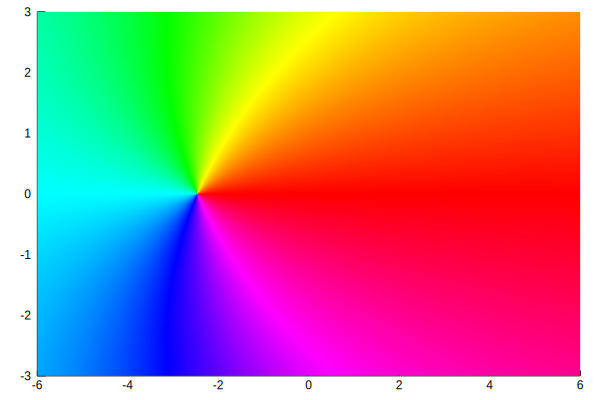

In [35]:
phaseplot(-6..6, -3..3, z -> cosh(sqrt(z)))

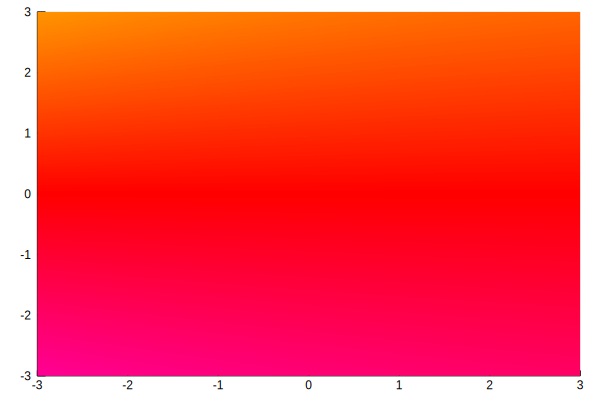

In [36]:
phaseplot(-3..3, -3..3, z -> sinh(sqrt(z))/sqrt(z))

 This follows from Taylor series, though I prefer the following argument: we have
$$
\cosh z = {\E^{z} + \E^{-z} \over 2}
$$
hence $\cosh{\I t } = \cos t = \cosh{-\I t}$. Therefore, on the possible branch cut $\cosh \sqrt z$ is continuous (hence analytic):
$$
\cosh \sqrt{x}_+ = \cosh \I \sqrt{|x|} = \cosh -\I \sqrt{|x|} = \cosh\sqrt{x}_-
$$
Similarly, 
$$
\sinh z = {\E^z - \E^{-z} \over 2}
$$
implies $\sinh{\I t} = \I \sin t = - \I \sin(-t) = -\sinh{-\I t}$, which gives us continuity:
$$
{\sinh \sqrt{x}_+ \over \sqrt{x}_+} = {\sinh \I \sqrt{|x|} \over \I \sqrt{|x|}} = {\sinh(-\I \sqrt{|x|)} \over -\I \sqrt{|x|}} ={\sinh \sqrt{x}_- \over \sqrt{x}_-}
$$
furthermore, they are both bounded at zero, hence analytic there too.

Here's a numerical example:

In [64]:
n = 5
A = randn(n,n) 
λ, V = eigen(A)

norm(A - V*Diagonal(λ)*inv(V))

5.93500670014108e-15

In [65]:
u₀ = randn(n)
v₀ = randn(n)
uv = solve(ODEProblem((uv,_,t) -> [uv[n+1:end]; A*uv[1:n]], [u₀; v₀], (0.,2.)); reltol=1E-10);

In [66]:
t = 2.0
uv(t)[1:n]

5-element Array{Float64,1}:
  3.803344206258081 
  0.9252585031733016
 -1.193805803087017 
  5.72798765024654  
  1.7188451287601578

In [67]:
V*Diagonal(cosh.(sqrt.(λ) .* t))*inv(V)*u₀ + 
   V*Diagonal(sinh.(sqrt.(λ) .* t) ./ sqrt.(λ))*inv(V)*v₀

5-element Array{Complex{Float64},1}:
   3.803344206066801 + 8.317464758586041e-16im 
  0.9252585029740441 + 2.2092966791530562e-16im
 -1.1938058030645906 + 9.308804664865466e-17im 
   5.727987650140507 + 7.402447551422406e-16im 
  1.7188451286631823 - 1.5268203762514324e-16im

Here's the solution using an elliptic integral:

In [68]:
n = 100
ellipse_f(z -> cosh(sqrt(z)*t), A, n, 0.0, 3.0, 3.0)*u₀ +
    ellipse_f(z -> sinh(sqrt(z)*t)/sqrt(z), A, n, 0.0, 3.0, 3.0)*v₀ 

5-element Array{Complex{Float64},1}:
  3.8033442060667997 - 1.0942835705045212e-16im
  0.9252585029740352 + 2.0727119042774893e-16im
 -1.1938058030645888 - 2.8947259388740214e-16im
  5.7279876501405145 - 1.9746496661590837e-16im
  1.7188451286631805 + 8.925757831726994e-17im 

## Problem 5.1



We have 
$$
{1 \over n} \sum_{j=0}^{n-1} g(\theta_j) = \sum_{k=0}^\infty g_k  {1 \over n} \sum_{j=0}^{n-1} \E^{\I k \theta_j}
$$
Define the $n$-th root of unity as $\omega = e^{2 \pi \I  \over n}$ (that is $\omega^n = 1$), and simplify 
$$
\sum_{j=0}^{n-1} \E^{\I k \theta_j} =\sum_{j=0}^{n-1} e^{{2 \pi j \I k \over n}} =\sum_{j=0}^{n-1} \omega^{kj}= \sum_{j=0}^{n-1} (\omega^k)^j
$$
If $k$ is a multiple of $n$, then $\omega^k = 1$, and this sum is equal to $n$. If $k$ is not a multiple of $n$, use Geometric series:
$$
\sum_{j=0}^{n-1} (\omega^k)^j = {\omega^{nk} - 1 \over \omega^k -1} = {1^k - 1 \over \omega^k-1} = 0
$$
## Problem 5.2 


From lecture 4, we have $|f_k| \leq M_r r^{-|k|}$ for any $1 \leq r < R$, where $M_r$ is the supremum of $f$ in an annulus $\{ z : r^{-1} < |z| < r \}$. Thus from the previous part we have (using geometric series)
$$
\left| {1 \over n} \sum_{j=0}^{n-1} g(\theta_j)  - { 1\over 2 \pi}	 \int_0^{2\pi} g(\theta) \D \theta \right| \leq \sum_{K=1}^\infty |f_{Kn}| + |f_{-Kn}| \leq 2M \sum_{K=1}^\infty r^{-Kn} = 2M_r {r^{-n} \over 1 - r^{-n}}.
$$
This is an upper bound that  decays exponentially fast. 

## Problem 5.3

Note that $f(z) = 2 z/(4z - z^2 - 1)$ satisfies $f(\E^{\I \theta}) = g(\theta)$. This has two poles at $2 \pm \sqrt 3$:

In [43]:
f = z -> 2z/(4z-z^2-1)
f(exp(0.1im)) - 1/(2-cos(0.1))

1.1102230246251565e-16 + 0.0im

Here's a phase plot showing the location of poles:

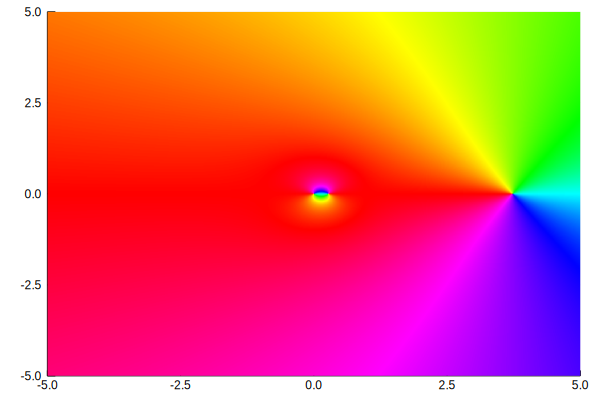

In [69]:
phaseplot(-5..5, -5..5, f)

In [72]:
2+sqrt(3), 2- sqrt(3), 1/(2+sqrt(3))

(3.732050807568877, 0.2679491924311228, 0.2679491924311227)

Note that $2+\sqrt 3 = 1/(2-\sqrt 3)$ so in the previous result, we take $R = 2+\sqrt 3$. For any $1 \leq r < 2+\sqrt 3$ we have 
$$
M_r = {2 \over 4 - r - r^{-1}}
$$

Thus we get the upper bounds
$$
    {4 \over 4 - r - r^{-1}} {r^{-n} \over 1 - r^{-n}}
$$

Let's see how sharp it is:

In [73]:
periodic_rule(n) = 2π/n*(0:(n-1)), 2π/n*ones(n)

g = θ -> 1/(2 - cos(θ))

Q = sum(Fun(g, 0 .. 2π))


err = Float64[ (
            (θ, w) = periodic_rule(n);
            sum(w.*g.(θ)) - Q
        ) for n=1:30];

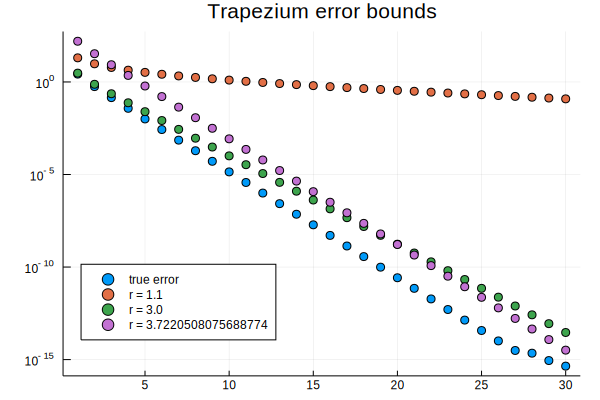

In [78]:
N = length(err)

scatter(abs.(err), yscale=:log10, label="true error", title="Trapezium error bounds", legend=:bottomleft)
r = 1.1
scatter!(4/(4-r-inv(r)) .* r.^(-(1:N)) ./ (1 .- r.^(-(1:N))), label = "r = $r")
r = 3.0
scatter!(4/(4-r-inv(r)) .* r.^(-(1:N)) ./ (1 .- r.^(-(1:N))), label = "r = $r")
r = 2+sqrt(3)  - 0.01
scatter!(4/(4-r-inv(r)) .* r.^(-(1:N)) ./ (1 .- r.^(-(1:N))), label = "r = $r")